In [2]:
%pip install rfflearn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement rfflearn (from versions: none)
ERROR: No matching distribution found for rfflearn


In [6]:
import numpy as np
import rfflearn.cpu as rfflearn                     # Import module
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])  # Define input data
y = np.array([1, 1, 2, 2])                          # Defile label data
svc = rfflearn.RFFSVC().fit(X, y)                   # Training (on CPU)
svc.score(X, y)                                     # Inference (on CPU)

svc.predict(np.array([[-0.8, -1]]))


array([1])

In [10]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])  # Define input data
y = np.array([1, 1, 0, 0])                          # Defile label data
svc = rfflearn.rfflearn_cpu_gp.GPC("rff").fit(X, y)                   # Training (on CPU)
svc.score(X, y)                                     # Inference (on CPU)

svc.predict(np.array([[-0.8, -1]]))

array([1], dtype=int64)

In [2]:
import site
print(site.getsitepackages())

['c:\\Users\\aejog\\anaconda3', 'c:\\Users\\aejog\\anaconda3\\Lib\\site-packages']


In [5]:
%pip install -r "C:\Users\aejog\Documents\stage-inria\projets\random-fourier-features\requirements.txt"


  Obtaining dependency information for optuna>=2.3.0 from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for shap>=0.37.0 from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/df/ed/c884465c33c25451e4a5cd4acad154c29e5341e3214e220e7f3478aa4b0d/alembic-1.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pyt

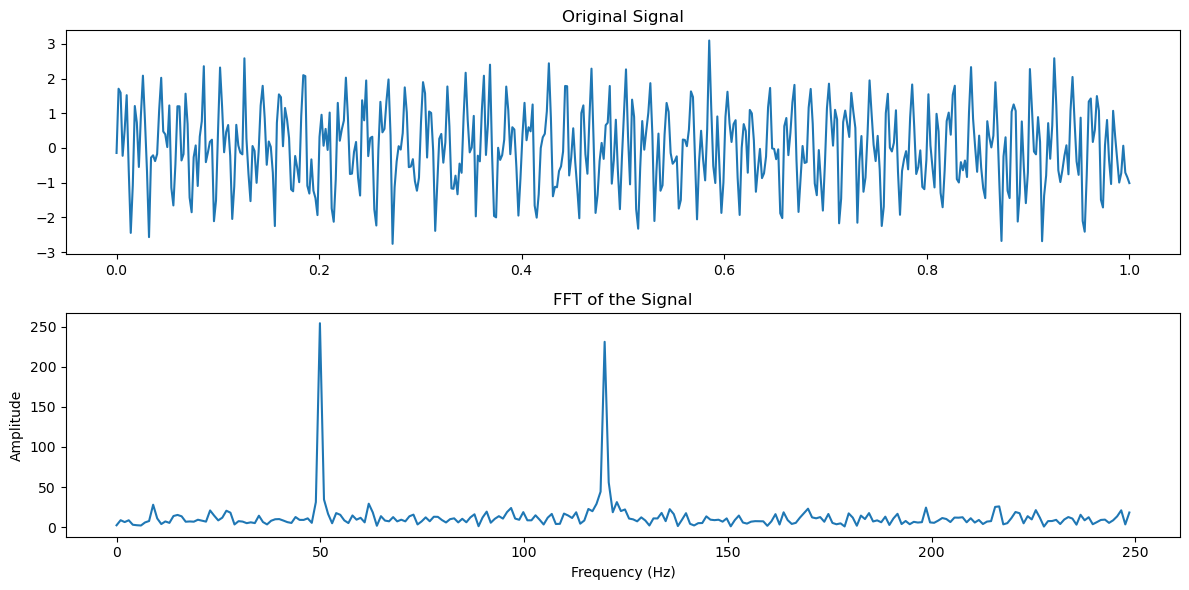

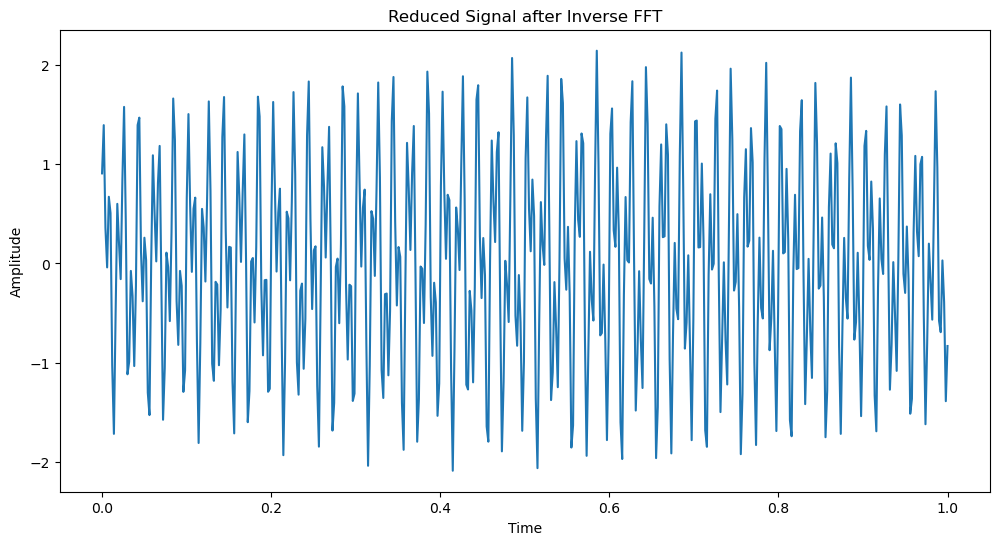

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: a simple time series
time = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * time) + np.sin(2 * np.pi * 120 * time)
signal += np.random.normal(0, 0.5, 500)  # Adding some noise

# Compute the FFT
fft_values = np.fft.fft(signal)

# Get the corresponding frequencies
frequencies = np.fft.fftfreq(len(signal), d=(time[1] - time[0]))

# Get the amplitude (magnitude) of the FFT values
amplitudes = np.abs(fft_values)

# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(amplitudes)//2])  # Only plot the positive frequencies
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Dimensionality Reduction: Keep only the top N significant frequencies
N = 10
indices = np.argsort(amplitudes)[-N:]  # Indices of the top N amplitudes

# Create a mask to zero out the non-significant frequencies
mask = np.zeros_like(fft_values, dtype=bool)
mask[indices] = True
reduced_fft_values = fft_values * mask

# Inverse FFT to get the reduced signal (if needed)
reduced_signal = np.fft.ifft(reduced_fft_values)

# Plot the reduced signal
plt.figure(figsize=(12, 6))
plt.plot(time, reduced_signal.real)
plt.title('Reduced Signal after Inverse FFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


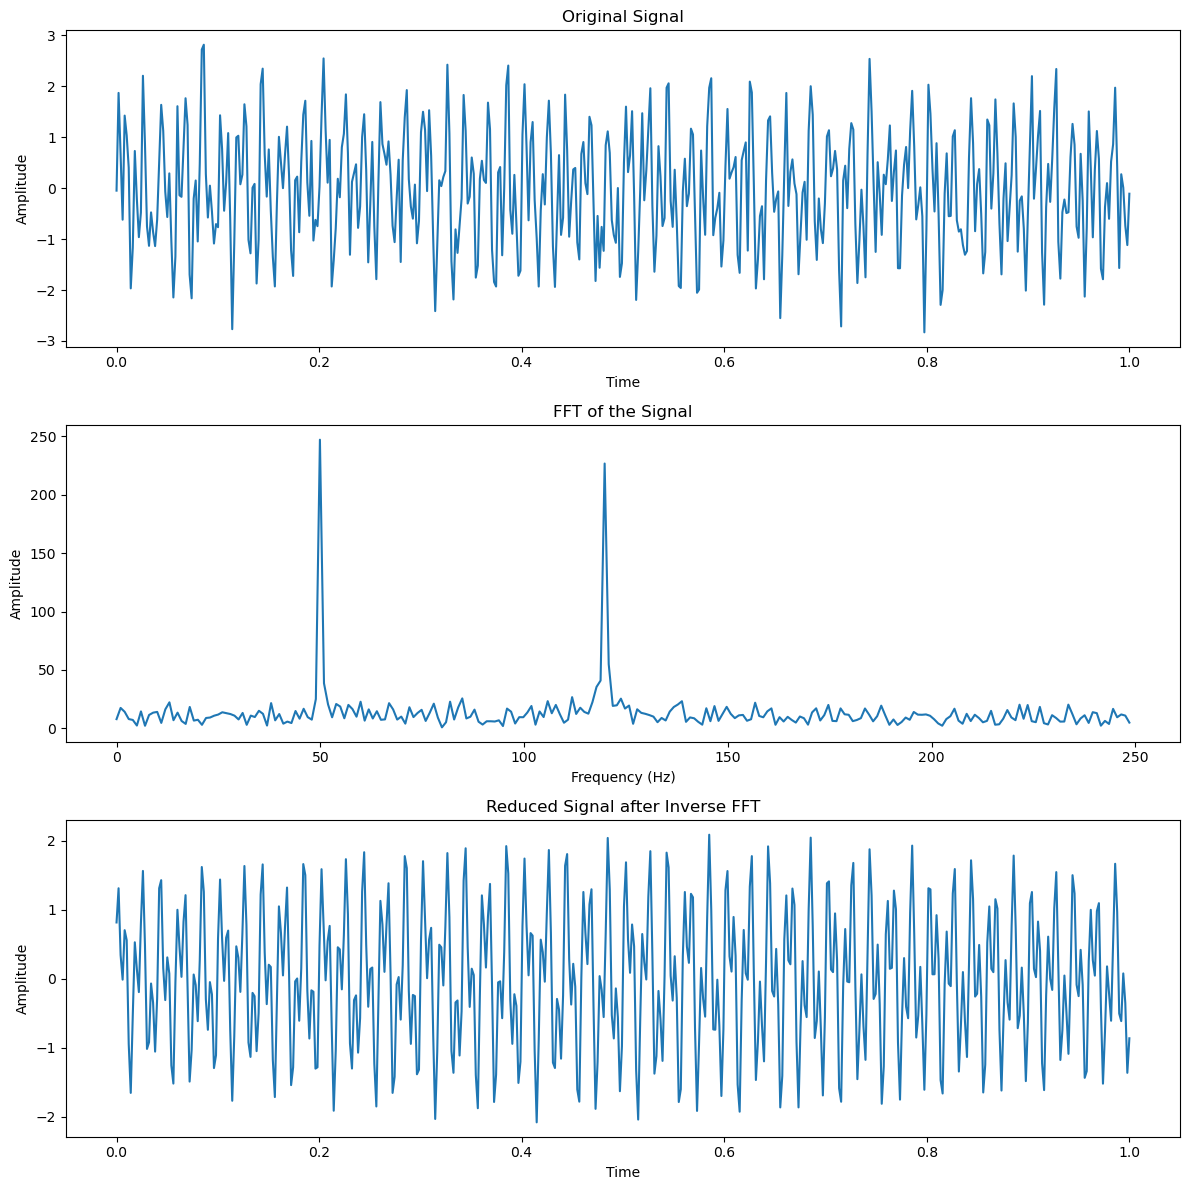

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: a simple time series
time = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * time) + np.sin(2 * np.pi * 120 * time)
signal += np.random.normal(0, 0.5, 500)  # Adding some noise

# Compute the FFT
fft_values = np.fft.fft(signal)

# Get the corresponding frequencies
frequencies = np.fft.fftfreq(len(signal), d=(time[1] - time[0]))

# Get the amplitude (magnitude) of the FFT values
amplitudes = np.abs(fft_values)

# Dimensionality Reduction: Keep only the top N significant frequencies
N = 10
indices = np.argsort(amplitudes)[-N:]  # Indices of the top N amplitudes

# Create a mask to zero out the non-significant frequencies
mask = np.zeros_like(fft_values, dtype=bool)
mask[indices] = True
reduced_fft_values = fft_values * mask

# Inverse FFT to get the reduced signal (if needed)
reduced_signal = np.fft.ifft(reduced_fft_values)

# Plot the original signal, its FFT, and the reduced signal in the same subplot
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

ax[0].plot(time, signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frequencies[:len(frequencies)//2], amplitudes[:len(amplitudes)//2])  # Only plot the positive frequencies
ax[1].set_title('FFT of the Signal')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].plot(time, reduced_signal.real)
ax[2].set_title('Reduced Signal after Inverse FFT')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()
